In [88]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

Define degree and weight list generators.

In [89]:
#generate random weight
def ran_weight(l, min, max):
    #l: length of the list
    #max/min: max/min of the list element
    randomlist = []
    for i in range(l):
        n = random.randint(min,max)
        randomlist.append(n)

    return randomlist

#generate random degree for simple connected diagram
def ran_deg(l, min=1 , max=None):
    #l: length
    #max/min: max/min of the degree
    max-=1
    list = []
    for i in range(l):
        n = random.randint(min,max)
        list.append(n)
    
    if sum(list)%2 != 0:
        k = int(random.random()*l)
        if list[k] == 1:       
            list[k] = list[k] + 1
        else:
            list[k] = list[k] - 1
    
    return list

Example

degree= [6, 3, 2, 3, 6, 4, 4, 6, 5, 1]
weight= [10, 5, 10, 9, 9, 10, 4, 7, 4, 7]
graph degree sequence [(0, 6), (1, 3), (2, 2), (3, 3), (4, 6), (5, 4), (6, 4), (7, 6), (8, 5), (9, 1)]


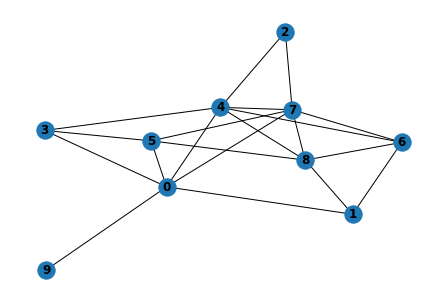

In [90]:
from Gphase import Gphase

length = 10
d_min = 2 #minimal degree, not suggested to be 1 for small d_max
d_max = 7 #maximal degree, where d_max < length, d_max not suggested to be small
w_min = 1 
w_max = 10

degree = ran_deg(length, d_min, d_max)
weight = ran_weight(length, w_min, w_max)

print('degree=', degree)
print('weight=', weight)


GP = Gphase(degree, weight)
G = GP.random_graph_gen()
nx.draw(G, with_labels=True, font_weight='bold')
print('graph degree sequence', G.degree())

Plot phase diagram.

Text(0, 0.5, 'normalized variance')

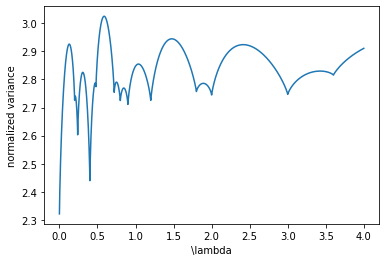

In [91]:
max_lamb = 4
lam_list, chi_list = GP.var_phase(max_lamb)

plt.plot(lam_list, chi_list)
plt.xlabel('\lambda')
plt.ylabel('normalized variance')

Derivatives of phase diagram.

In [92]:
dev1, dev2, m_index = GP.dev(lam_list, chi_list)

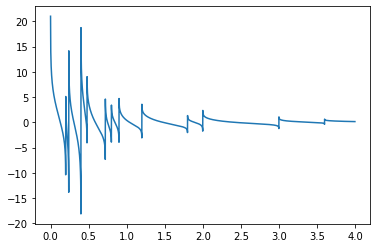

In [93]:
plt.plot(lam_list[:-1], dev1)

transitions at [0.199 0.239 0.399 0.479 0.719 0.799 0.899 1.199 1.799 1.999 2.999 3.599]


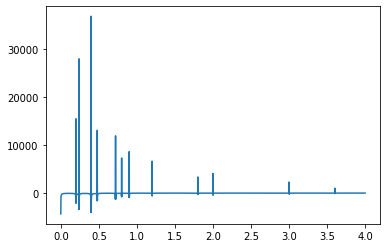

In [94]:
plt.plot(lam_list[:-2], dev2)
print('transitions at', m_index)

Reduced weight lists for chosen lambdas. You can do manual verification using this.

In [95]:
l_chosen, w_red = GP.verify_list(m_index, lam_list)

print('choose lambda at', l_chosen)
print('reduced weight', w_red)

choose lambda at [0.0995, 0.219, 0.319, 0.439, 0.599, 0.759, 0.849, 1.049, 1.499, 1.899, 2.499, 3.2990000000000004, 3.7990000000000004]
reduced weight [array([ 0.35854167, -0.15854167, -0.44145833, -0.224875  ,  0.375125  ,
       -0.04145833,  0.05804167,  0.40829167,  0.25804167, -0.59170833]), array([ 0.30875, -0.10875, -0.49125, -0.25475,  0.34525, -0.09125,
        0.12775,  0.41825,  0.32775, -0.58175]), array([ 0.26708333, -0.06708333, -0.53291667, -0.27975   ,  0.32025   ,
       -0.13291667,  0.18608333,  0.42658333,  0.38608333, -0.57341667]), array([ 0.20893487, -0.01644209, -0.56103625, -0.2981232 ,  0.27935515,
       -0.17605069,  0.24647097,  0.4201957 ,  0.43896375, -0.54226821]), array([ 0.12545177,  0.04135391, -0.54177092, -0.29170142,  0.2087156 ,
       -0.20815958,  0.29142341,  0.37524326,  0.45822908, -0.4587851 ]), array([ 0.0616262 ,  0.08554084, -0.52704194, -0.28679176,  0.15470935,
       -0.23270787,  0.32579102,  0.34087564,  0.47295806, -0.39495953]), ar

Calculate maximum weight by calcuating for every lambda.

In [96]:
w_tot_list = []
L_list = []

for w_reduced in w_red:
    I, w_tot = GP.total_weight(G, w_reduced, weight)
    L_list.append(I)
    w_tot_list.append(w_tot)

max_index = w_tot_list.index(max(w_tot_list))
print('all calculated weights', w_tot_list)
print('maximum weight is ', max(w_tot_list))
print('chosen nodes are', L_list[max_index])

all calculated weights [31, 31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32]
maximum weight is  32
chosen nodes are [2, 5, 9, 1]


Plot real phase diagram (for small graph).

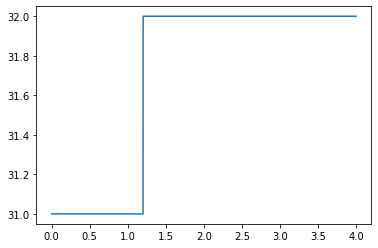

In [97]:
w_list = GP.phase_all(G, lam_list)
plt.plot(lam_list, w_list)

In [98]:
real_transitions = find_peaks(np.diff(w_list))[0]/1000
print(real_transitions)


[1.2]


Check if it is in the pervious set of transition points.

In [99]:
real_transitions = [round(i,2) for i in real_transitions]
m_index = [round(i,2) for i in m_index]
for i in real_transitions:
    if i in m_index:
        print(True)
    else:
        print(i, 'is not a transtion.')

True
